<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pietr\AppData\Local\Temp\ipykernel_12356\3171390609.py:5: SyntaxWarning: invalid escape sequence '\d'
  qol_data = pd.read_csv("..\data\overall_life_satisfaction\estat_ilc_pw01_filtered_en.csv", usecols= ['geo','TIME_PERIOD','OBS_VALUE'])
C:\Users\pietr\AppData\Local\Temp\ipykernel_12356\3171390609.py:9: SyntaxWarning: invalid escape sequence '\d'
  europe_map = gpd.read_file("..\data\europe_map\europe.geojson")


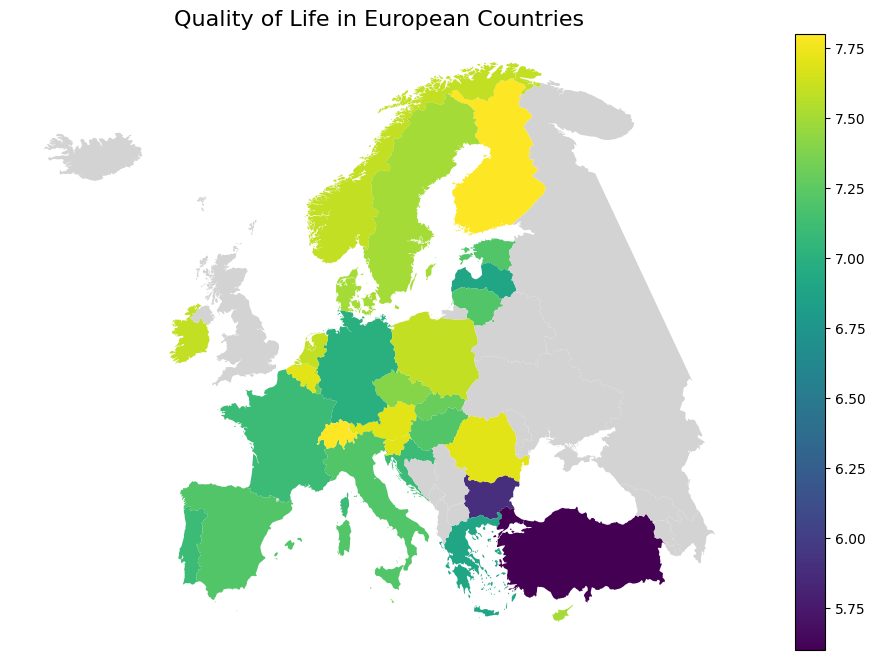

In [72]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

qol_data = pd.read_csv("..\data\overall_life_satisfaction\estat_ilc_pw01_filtered_en.csv", usecols= ['geo','TIME_PERIOD','OBS_VALUE'])
qol_data = qol_data.loc[qol_data['TIME_PERIOD'] == 2023]
qol_data.loc[qol_data['geo'] == 'Czechia', 'geo'] = 'Czech Republic'
qol_data.loc[qol_data['geo'] == 'Türkiye', 'geo'] = 'Turkey'
europe_map = gpd.read_file("..\data\europe_map\europe.geojson")

europe_map = europe_map.merge(qol_data, left_on='NAME', right_on='geo', how='left')
europe_map = europe_map.to_crs(epsg=4326)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
europe_map.plot(
    column='OBS_VALUE',
    cmap='viridis',
    legend=True,
    missing_kwds={"color": "lightgrey"},
    ax=ax
)

ax.set_title("Quality of Life in European Countries", fontsize=16)
ax.set_axis_off()
plt.show()